In [49]:
import pickle
import os
import numpy as np

In [214]:
path = os.path.abspath('__file__')
path = os.path.split(path)[0]
file = os.path.join(path, '../pickle_files/tmp.p')

with open(file, 'rb') as f:
    df = pickle.load(f)

In [227]:
X = df[['embedding']]
y = df.iloc[:, -6:]

In [15]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [88]:
from tensorflow.keras import models, layers
from tensorflow import convert_to_tensor

In [37]:
input_dim = X.embedding[0].shape[0]
output_dim = len(y.columns)

In [111]:
X_train_array = X_train.embedding.to_numpy()
X_test_array = X_test.embedding.to_numpy()


#X_train_array = np.expand_dims(X_train_array, -1)
#X_test_array = np.expand_dims(X_test_array, -1)
#y_train_array = np.expand_dims(X_test_array, -1)
#y_test_array = np.expand_dims(y_test_array, -1)

In [217]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)

In [224]:
type(X.embedding[0])

numpy.ndarray

In [242]:
model = models.Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_test, y, batch_size=10,
          validation_split=0.3, epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 227ms/step - loss: 40.2116 - accuracy: 0.2153 - val_loss: 35.2976 - val_accuracy: 0.3667
Epoch 2/100
7/7 [==============================] - 0s 50ms/step - loss: 41.1174 - accuracy: 0.4862 - val_loss: 35.2970 - val_accuracy: 0.3667
Epoch 3/100
7/7 [==============================] - 0s 29ms/step - loss: 41.0303 - accuracy: 0.4980 - val_loss: 35.2976 - val_accuracy: 0.3667
Epoch 4/100
7/7 [==============================] - 0s 36ms/step - loss: 38.6908 - accuracy: 0.4601 - val_loss: 35.2981 - val_accuracy: 0.3667
Epoch 5/100
7/7 [==============================] - 0s 52ms/step - loss: 40.9388 - accuracy: 0.4824 - val_loss: 35.2995 - val_accuracy: 0.3667
Epoch 6/100
7/7 [==============================] - 0s 46ms/step - loss: 41.6226 - accuracy: 0.5003 - val_loss: 35.3021 - val_accuracy: 0.3667
Epoch 7/100
7/7 [==============================] - 0s 38ms/step - loss: 39.9046 - accuracy: 0.4635 - val_loss: 35.3068 - val_accuracy: 0.3667
Epoch

7/7 [==============================] - 0s 58ms/step - loss: 803.3461 - accuracy: 0.4064 - val_loss: 745.8432 - val_accuracy: 0.3667
Epoch 59/100
7/7 [==============================] - 0s 53ms/step - loss: 875.8832 - accuracy: 0.4789 - val_loss: 796.7391 - val_accuracy: 0.3667
Epoch 60/100
7/7 [==============================] - 0s 52ms/step - loss: 927.6518 - accuracy: 0.4618 - val_loss: 848.2901 - val_accuracy: 0.3667
Epoch 61/100
7/7 [==============================] - 0s 65ms/step - loss: 921.9530 - accuracy: 0.3553 - val_loss: 902.1891 - val_accuracy: 0.3667
Epoch 62/100
7/7 [==============================] - 0s 63ms/step - loss: 1043.0098 - accuracy: 0.4530 - val_loss: 959.7428 - val_accuracy: 0.3667
Epoch 63/100
7/7 [==============================] - 0s 43ms/step - loss: 1090.3177 - accuracy: 0.4768 - val_loss: 1020.3207 - val_accuracy: 0.3667
Epoch 64/100
7/7 [==============================] - 0s 32ms/step - loss: 1188.0812 - accuracy: 0.4585 - val_loss: 1081.5939 - val_accuracy: 

In [211]:
type(MINST_X_test[0][0])


numpy.ndarray

In [171]:
type(X_train_array)

numpy.ndarray

In [177]:
type(MINST_X_test[0][0])

numpy.ndarray

In [178]:
type(X_train_array[0])

numpy.ndarray

In [180]:
MINST_X_test.shape

(10000, 28, 28)

In [184]:
print(type(X_train_array))
print(type(X_train_array[0]))
print(type(X_train_array[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float32'>


In [186]:
X_train_array[0]

array([-7.4962509e-04, -2.8709616e-04, -8.4405858e-03, ...,
        8.6886969e-09,  3.8507022e-07, -1.3170514e-01], dtype=float32)

In [192]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]


(None, 2048) <dtype: 'float32'>
(None, 6) <dtype: 'float32'>
dense_33 (None, 2048) float32
dense_34 (None, 10) float32
dense_35 (None, 10) float32


[None, None, None]

In [229]:
X_test = np.ndarray((100, input_dim))

In [236]:
for i in range(len(X)):
    X_test[i] = X.embedding[i]

In [246]:
import matplotlib.pyplot as plt

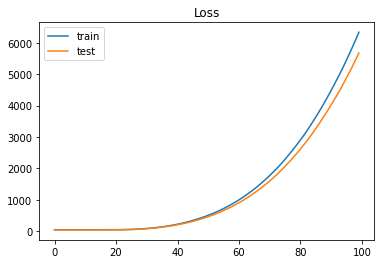

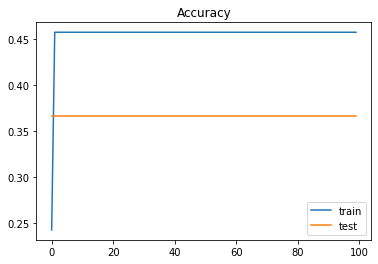

In [252]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()
plt.show()

In [253]:
def plot_history(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [257]:
X_test

array([[-2.90224166e-03, -2.05143049e-04,  6.11553574e-03, ...,
         2.34945894e-08, -3.24927996e-08, -1.79187804e-01],
       [-3.42500326e-03, -1.93658547e-04,  5.54786855e-03, ...,
         2.04515462e-08,  7.14510747e-07, -1.45690665e-01],
       [-3.29600088e-03, -1.90967592e-04,  1.04903486e-02, ...,
         1.32492026e-08,  8.39654035e-08, -1.52448326e-01],
       ...,
       [-2.77828937e-03, -2.11689810e-04,  7.75222387e-03, ...,
         1.89823890e-08,  2.91031029e-07, -8.20391476e-02],
       [ 5.16748463e-04, -1.52824956e-04,  5.37167722e-03, ...,
         1.46939056e-08, -2.67830643e-07, -1.09780289e-01],
       [-6.15738844e-03, -1.54456764e-04,  2.18455661e-02, ...,
         1.39663872e-08,  7.60007288e-06, -1.17560662e-01]])

In [262]:
input_shape = np.expand_dims(X_test, -1).shape
X_test = np.expand_dims(X_test, -1)

In [265]:
input_shape = input_shape[1:]

In [268]:
input_shape

(2048, 1)

In [267]:
model = models.Sequential()
model.add(layers.Conv2D(8, kernel_size=(3,3), input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_test, y, batch_size=10,
          validation_split=0.3, epochs=100)

ValueError: Input 0 of layer conv2d_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 2048, 1)